<div id="image">
<img src="https://www.imt-atlantique.fr/sites/default/files/logo_mt_0_0.png" WIDTH=280 HEIGHT=280>
</div>
<div id="subject">
<CENTER>
</br>


<font size="5"></br> UE Introduction au Machine Learning: Project ML </font></br></div>
</CENTER>
<CENTER>
<font size="3"></br></font></br></div>
</CENTER>
<CENTER>
<span style="color:blue"></span>
</CENTER>

**The objective of the project is to apply a Machine Learning model onto two different datasets:**
- Banknote Authentication Dataset
- Chronic Kidney Disease:


Workflow : 

1. Import the dataset
2. Clean the data, perform pre-processing
I Replace missing values by average or median values
I Center and normalize the data
3. Split the dataset
I Split between training set and test set
I Split the training set for cross-validation
4. Train the model (including feature selection)
5. Validate the model

**Objective:** collaboratively implement this workflow and apply it to different ML problems/datasets

# Import Data 



In [1]:
from library import *
import numpy as np
import scipy.io as sio
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
from pylab import *
from sklearn import svm

In [2]:
data_bank = pd.read_csv('./data/data_banknote_authentication.txt', sep=",", header=None)
data_disease = pd.read_csv('./data/kidney_disease.csv', sep=",", header=0) 

# Dataset Cleaning 
- Handle missing and categorical values
- Replace missing values by average or median values
- Center and normalize the data

In [3]:
data_bank_cleaned = clean_data_f(data_bank)
data_disease_cleaned = clean_data_f(data_disease)
#data_cleaned.head()
#data_disease_cleaned.head()

/home/sella/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3417: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/sella/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3558: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


# Split the data set & PCA
- Split between training set and test set
- Split the training set for cross-validation

In [4]:
#Assumption of PCA : Data are gaussian distributed. We can check this assumption thanks to Shapiro Test 
p_values_bank = shapiro_test(data_bank_cleaned)
p_values_disease = shapiro_test(data_disease_cleaned)

print(f"{p_values_bank = }")
print(f"{p_values_disease = }")

p_values_bank = array([4.68890725e-12, 8.22498807e-15, 2.75900453e-25, 4.46916858e-27,
       0.00000000e+00])
p_values_disease = array([9.57961488e-10, 3.20041629e-08, 7.95709947e-18, 4.91368133e-15,
       4.75813730e-23, 5.67730916e-32, 8.25855380e-35, 1.55249802e-32,
       2.88500637e-35, 2.26948537e-37, 3.35469001e-23, 3.17993948e-25,
       2.58210696e-34, 3.11202951e-30, 2.81900249e-38, 2.36913285e-04,
       6.31699893e-14, 1.09465918e-18, 1.51910928e-20, 4.78966830e-29,
       2.26097134e-29, 4.76978967e-36, 3.92352420e-32, 1.55249802e-32,
       1.02025416e-33, 5.85234078e-29])


Comment: Au vu des valeurs de p value, l'hypothèse selon laquelle les distributions sont normales ne semble pas vérifiée bien que les résultats obtenus par PCA soient tout à fait satisfaisant par la suite 

In [5]:
X_train_bank, X_test_bank, y_train_bank, y_test_bank = split_data_df(data_bank_cleaned, test_size=1/3)
X_train_disease, X_test_disease, y_train_disease, y_test_disease, nb_features_disease = split_data_and_pca(data_disease_cleaned, test_size=1/3)

#print(f"{nb_features_disease = }")

# SVM Method

### Banknote Dataset

In [6]:
# Format the data as numpy arrays
X = dataset_to_numpy(data_bank_cleaned)
y = data_bank_cleaned[4].to_numpy() 

In [7]:
# Test the SVM on the Banknote Dataset
precisions, recalls = testSVM(X,y)

precision for class 0,1 : [1.0, 0.96]
recalls   for class 0,1 : [0.97, 1.0]


In [8]:
# Generate a set of SVM Classifiers to test
clfs = {
    "linear": svm.SVC(kernel="linear", C=1.0),
    "poly2": svm.SVC(kernel="poly", C=1.0, degree=2, gamma="scale", coef0=0.0),
    # "poly3": svm.SVC(kernel="poly", C=1.0, degree=3, gamma="scale", coef0=0.0),
    # "poly4": svm.SVC(kernel="poly", C=1.0, degree=4, gamma="scale", coef0=0.0),
    "rbf": svm.SVC(kernel="rbf", C=1.0, gamma="scale"),
    # "sigmoid": svm.SVC(kernel="sigmoid", C=1.0, gamma="scale", coef0=0.0),
}

In [9]:
# Do a cross validation for the multiple classifiers
crossValidation(X,y,clfs)

classes:             [   0    1]
linear         
     precisions
                mean: [1.00 0.97]
                 std: [0.00 0.02]
        recalls
                mean: [0.97 1.00]
                 std: [0.02 0.01]
poly2          
     precisions
                mean: [0.75 0.81]
                 std: [0.04 0.06]
        recalls
                mean: [0.88 0.63]
                 std: [0.03 0.06]
rbf            
     precisions
                mean: [1.00 1.00]
                 std: [0.00 0.00]
        recalls
                mean: [1.00 1.00]
                 std: [0.00 0.00]


### Kidney Disease Dataset

In [10]:
X=dataset_to_numpy(data_disease_cleaned,first_col=1, last_col=-2)
y = data_disease_cleaned[data_disease_cleaned.columns[-1]].to_numpy()
X_pca=pca(X)

In [11]:
# Test SVM on the Kidney Disease Dataset
precisions, recalls = testSVM(X_pca,y)

precision for class 0,1 : [0.87, 0.81]
recalls   for class 0,1 : [0.89, 0.77]


In [12]:
crossValidation(X_pca,y,clfs)

classes:             [   0    1]
linear         
     precisions
                mean: [0.98 0.94]
                 std: [0.03 0.04]
        recalls
                mean: [0.96 0.98]
                 std: [0.02 0.04]
poly2          
     precisions
                mean: [0.78 0.91]
                 std: [0.09 0.09]
        recalls
                mean: [0.97 0.55]
                 std: [0.03 0.13]
rbf            
     precisions
                mean: [0.87 0.91]
                 std: [0.07 0.08]
        recalls
                mean: [0.95 0.77]
                 std: [0.04 0.10]


# Logistic Regression

### Banknote Dataset

Validation Model : Logistic Regression
Your model has a log_loss of : 0.68%
Your model has an accuracy of : 98.03%
Your model has a recall of : 98.94%
Your model has a F1 score = 0.98 


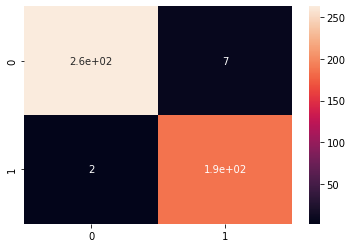

In [13]:
## Bank Note ##
y_pred_lr_bank = Logistic_regression(X_train_bank, X_test_bank, y_train_bank, y_test_bank)
confusionMatrix(y_test_bank, y_pred_lr_bank)

print('Validation Model : Logistic Regression')
validateModel(y_test_bank, y_pred_lr_bank)

### Kidney Disease Dataset

Validation Model : Logistic Regression
Your model has a log_loss of : 0.26%
Your model has an accuracy of : 99.25%
Your model has a recall of : 98.11%
Your model has a F1 score = 0.99 


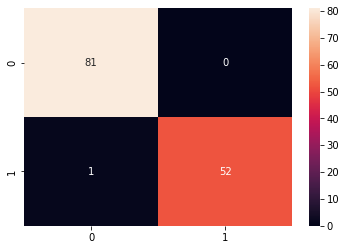

In [14]:
# Disease Note ##
y_pred_lr_disease = Logistic_regression(X_train_disease, X_test_disease, y_train_disease, y_test_disease)
confusionMatrix(y_test_disease, y_pred_lr_disease)

print('Validation Model : Logistic Regression')
validateModel(y_test_disease, y_pred_lr_disease)

# KNN

### Kidney Disease Dataset

In [15]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
test_size = 0.3
for n in range(1,Ks):
    
    #Train Model and Predict  
    X_train, X_test, y_train, y_test = split_data_df(data_disease_cleaned, test_size)
    neigh  = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    y_pred = neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, y_pred)

    
    std_acc[n-1]=np.std(y_pred==y_test)/np.sqrt(y_pred.shape[0])

# mean_acc

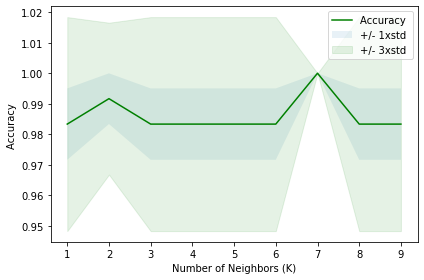

In [16]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [17]:
print( f"The best accuracy was with {mean_acc.max():.3f} with k= {mean_acc.argmax()+1}") 

The best accuracy was with 1.000 with k= 7


### Banknote Dataset

In [18]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
test_size = 0.3
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train_bank,y_train_bank)
    y_pred_bank = neigh.predict(X_test_bank)
    mean_acc[n-1] = metrics.accuracy_score(y_test_bank, y_pred_bank)

    
    std_acc[n-1]=np.std(y_pred_bank==y_test_bank)/np.sqrt(y_pred.shape[0])

# mean_acc

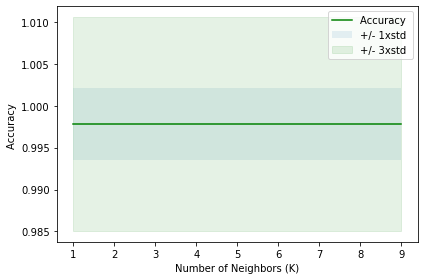

In [19]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [20]:
print( f"The best accuracy was with {mean_acc.max():.3f} with k= {mean_acc.argmax()+1}") 

The best accuracy was with 0.998 with k= 1


# Decision Forest

### Banknote Dataset

In [21]:
# Training Decision Trees
Bank_Class_DeciForest = trainDecisionForest(X_train_bank, y_train_bank, 100)
Bank_Class_AdaBoost = trainAdaBoost(X_train_bank, y_train_bank, 100)

# Test Decision Trees
Bank_Predic_DeciForest = testClassifier(Bank_Class_DeciForest, X_test_bank)
Bank_Predic_AdaBoost = testClassifier(Bank_Class_AdaBoost, X_test_bank)

Optimal Depth = 18


Validation Model : Decision Forest
Your model has a log_loss of : 0.45%
Your model has an accuracy of : 98.69%
Your model has a recall of : 97.87%
Your model has a F1 score = 0.98 


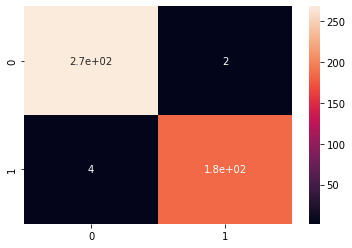

In [22]:
# Decision Trees Validation
Bank_Conf_DeciForest = confusionMatrix(y_test_bank, Bank_Predic_DeciForest)

print('Validation Model : Decision Forest')
validateModel(y_test_bank, Bank_Predic_DeciForest)


Validation Model : Ada Boost
Your model has a log_loss of : 0.23%
Your model has an accuracy of : 99.34%
Your model has a recall of : 98.94%
Your model has a F1 score = 0.99 


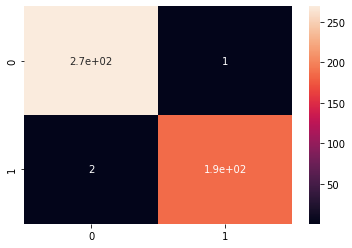

In [23]:
# Ada Boost Validation
Bank_Conf_AdaBoost = confusionMatrix(y_test_bank, Bank_Predic_AdaBoost)

print('Validation Model : Ada Boost')
validateModel(y_test_bank, Bank_Predic_AdaBoost)

### Kidney Disease Dataset

In [24]:
# Training Decision Trees
Disease_Class_DeciForest = trainDecisionForest(X_train_disease, y_train_disease, 100)
Disease_Class_AdaBoost = trainAdaBoost(X_train_disease, y_train_disease, 100)

# Test Decision Trees
Disease_Predic_DeciForest = testClassifier(Disease_Class_DeciForest, X_test_disease)
Disease_Predic_AdaBoost = testClassifier(Disease_Class_AdaBoost, X_test_disease)

Optimal Depth = 2


Validation Model : Decision Forest
Your model has a log_loss of : 0.77%
Your model has an accuracy of : 97.76%
Your model has a recall of : 94.34%
Your model has a F1 score = 0.97 


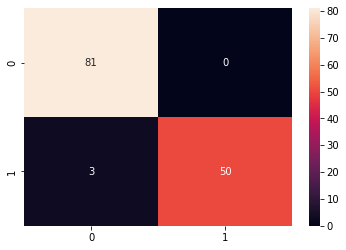

In [25]:
# Decision Trees Validation
Disease_Conf_DeciForest = confusionMatrix(y_test_disease, Disease_Predic_DeciForest)

print('Validation Model : Decision Forest')
validateModel(y_test_disease, Disease_Predic_DeciForest)

Validation Model : Ada Boost
Your model has a log_loss of : 0.52%
Your model has an accuracy of : 98.51%
Your model has a recall of : 96.23%
Your model has a F1 score = 0.98 


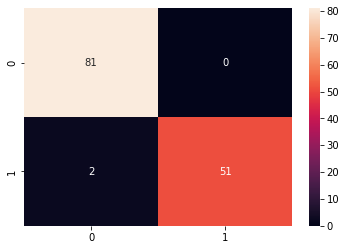

In [26]:
# Ada Boost Validation
Bank_Conf_AdaBoost = confusionMatrix(y_test_disease, Disease_Predic_AdaBoost)

print('Validation Model : Ada Boost')
validateModel(y_test_disease, Disease_Predic_AdaBoost)